### Workaround for "K-means can’t handle non-convex sets"

In Euclidean space, an object is convex if for every pair of points within the object, every point on the straight line segment that joins them is also within the object

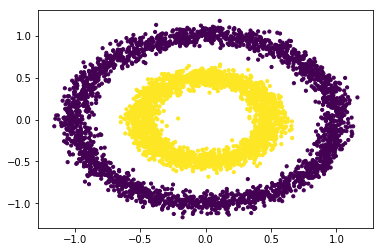

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
### introduce large number of samples
X_test, y_test = datasets.make_circles(n_samples=5000, factor=.5,
                                  noise=.06)
plt.scatter(X_test[:, 0], X_test[:, 1], s=10, c=y_test)
plt.show()

### k-means can be slow for large numbers of samples
Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows. You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step. This is the idea behind batch-based k-means algorithms, one form of which is implemented in `sklearn.cluster.MiniBatchKMeans`. The interface for this is the same as for standard KMeans [1]

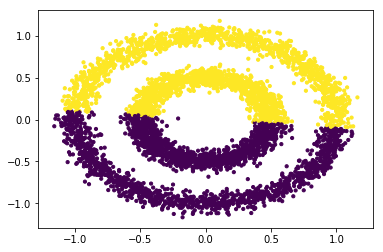

In [50]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=2)
labels = model.fit_predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=labels,
            s=10, cmap='viridis');

### As we can observe, K-means themself cannot handle non-convex shapes

however, by combining k-means with *hierarchical clustering*, we can solve this problem. 

- First, we cluster the data into a large number of clusters using k-means.
- Then, we take these many clusters from k-means and then start clustering them together into bigger clusters using a single-link agglomerative method. That is, we repeatedly pick the two clusters that are closest together and merge them. It is important in this scenario that we use the **“single-link” method**, in which the distance between two clusters is defined by the distance between the two closest data points we can find, one from each cluster.

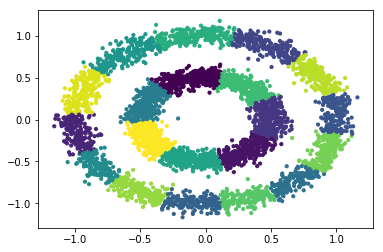

In [51]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=20)
labels = model.fit_predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=labels,
            s=10, cmap='viridis');

In [56]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, linkage='single').fit(X_test)
predicted_labels = clustering.labels_

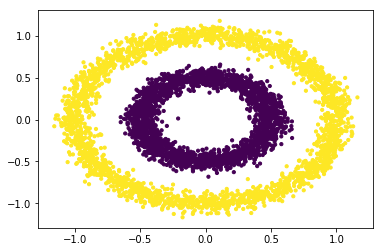

In [57]:
### here k means can't handle too much noise
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_labels,
            s=10, cmap='viridis');

In [63]:
import sklearn
print("accuracy", sklearn.metrics.accuracy_score(y_test, predicted_labels))

accuracy 0.0


Ooops! Because we don't know which labels should the clusters have (labels may be permuted like in our case) the accuracy is 0. We can fix this by matching each learned cluster label with the true labels found in them:

In [64]:
from scipy.stats import mode

labels = np.zeros_like(predicted_labels)
for i in range(2):
    mask = (predicted_labels == i)
    labels[mask] = mode(y_test[mask])[0]

In [65]:
import sklearn
print("accuracy", sklearn.metrics.accuracy_score(y_test, labels))

accuracy 1.0


### References:

1. Jake VanderPlas. 2016. Python Data Science Handbook: Essential Tools for Working with Data (1st. ed.). O'Reilly Media, Inc.